# Deterministic Thinking and Its Limits: When Models Assume Certainty

This notebook demonstrates a fundamental limit of optimization: **deterministic thinking** assumes inputs are fixed and certain, but the real world is uncertain.

Understanding this limit is critical because:
- Optimization models assume inputs are known exactly
- Reality is uncertain: demand fluctuates, costs change, conditions vary
- When inputs differ from assumptions, optimal solutions become suboptimal
- Results are best estimates, not guarantees


## Key Concepts

**Deterministic Models** assume inputs are fixed and certain:
- Demand forecasts are treated as exact values
- Cost estimates are treated as certain
- Conditions are assumed to be stable
- The model optimizes for these specific values

**Reality is Uncertain**:
- Demand fluctuates (higher or lower than forecasted)
- Costs vary (increase or decrease)
- Conditions change (breakdowns, maintenance, disruptions)

**Critical insight**: Models assume certainty; reality is uncertain. When reality differs from assumptions, optimal solutions become suboptimal. Results are best estimates, not guarantees.


## Scenario: Production Planning with Demand Uncertainty

You need to schedule production based on a demand forecast. But actual demand may differ from the forecast.

**Decision**: How many units to produce?

**Model assumption**: Demand will be exactly as forecasted (deterministic)

**Reality**: Demand is uncertain and may vary


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install the `pulp` package first. This cell can be skipped if running locally and the package is already installed.


In [1]:
# Install pulp package (required for optimization)
# This is needed in Google Colab; can be skipped if already installed locally
%pip install pulp -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value


## Step 3: Optimize with Forecasted Demand (Deterministic)

The model assumes demand will be exactly as forecasted:


In [3]:
# Problem inputs
profit_A = 50  # Profit per unit of Product A ($)
profit_B = 40  # Profit per unit of Product B ($)

capacity = 2000  # Total production capacity (units)
labor_hours = 1500  # Available labor hours
labor_per_A = 0.5  # Labor hours per unit of A
labor_per_B = 0.8  # Labor hours per unit of B

# FORECASTED demand (what the model assumes)
forecast_demand_A = 1000  # Forecast: 1,000 units
forecast_demand_B = 800   # Forecast: 800 units

print("MODEL ASSUMPTIONS (Deterministic):")
print("=" * 60)
print(f"  Forecasted Demand A: {forecast_demand_A} units (assumed exact)")
print(f"  Forecasted Demand B: {forecast_demand_B} units (assumed exact)")
print(f"  The model treats these as CERTAIN values")

# Create optimization model
model = LpProblem("Production_Deterministic", LpMaximize)

# Decision variables
produce_A = LpVariable("produce_A", lowBound=0, cat='Continuous')
produce_B = LpVariable("produce_B", lowBound=0, cat='Continuous')

# Objective: Maximize profit
model += profit_A * produce_A + profit_B * produce_B, "Total_Profit"

# Constraints
model += produce_A + produce_B <= capacity, "Capacity_Limit"
model += labor_per_A * produce_A + labor_per_B * produce_B <= labor_hours, "Labor_Limit"
model += produce_A <= forecast_demand_A, "Demand_A_Limit"  # Uses forecast (assumed exact)
model += produce_B <= forecast_demand_B, "Demand_B_Limit"  # Uses forecast (assumed exact)

# Solve
model.solve()

optimal_A_forecast = value(produce_A)
optimal_B_forecast = value(produce_B)
optimal_profit_forecast = value(model.objective)

print(f"\nOPTIMAL SOLUTION (Based on Forecast):")
print(f"  Produce {optimal_A_forecast:.1f} units of Product A")
print(f"  Produce {optimal_B_forecast:.1f} units of Product B")
print(f"  Expected Profit: ${optimal_profit_forecast:,.2f}")
print(f"\nThis solution is optimal FOR THE FORECASTED DEMAND.")
print(f"The model assumes demand will be exactly as forecasted.")


MODEL ASSUMPTIONS (Deterministic):
  Forecasted Demand A: 1000 units (assumed exact)
  Forecasted Demand B: 800 units (assumed exact)
  The model treats these as CERTAIN values
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/dbf302c321da475ba6af9f182859aa52-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/dbf302c321da475ba6af9f182859aa52-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal 

## Step 4: What If Actual Demand Differs? (Reality Is Uncertain)

Now let's see what happens when actual demand is different from the forecast:


In [4]:
# Scenario 1: Actual demand is HIGHER than forecast
actual_demand_A_high = 1200  # Actual: 1,200 units (20% higher than forecast)
actual_demand_B_high = 900   # Actual: 900 units (12.5% higher than forecast)

print("SCENARIO 1: Actual Demand is HIGHER than Forecast")
print("=" * 60)
print(f"  Forecasted: A={forecast_demand_A}, B={forecast_demand_B}")
print(f"  Actual:     A={actual_demand_A_high}, B={actual_demand_B_high}")
print(f"  Difference: A=+{actual_demand_A_high - forecast_demand_A} (+{((actual_demand_A_high - forecast_demand_A)/forecast_demand_A)*100:.1f}%)")
print(f"              B=+{actual_demand_B_high - forecast_demand_B} (+{((actual_demand_B_high - forecast_demand_B)/forecast_demand_B)*100:.1f}%)")

# Evaluate the "optimal" solution with actual demand
# The solution was optimal for forecast, but what about actual demand?
actual_profit_high = profit_A * min(optimal_A_forecast, actual_demand_A_high) + \
                     profit_B * min(optimal_B_forecast, actual_demand_B_high)

# What would be optimal for actual demand?
model_actual_high = LpProblem("Production_Actual_High", LpMaximize)
produce_A_high = LpVariable("produce_A_high", lowBound=0, cat='Continuous')
produce_B_high = LpVariable("produce_B_high", lowBound=0, cat='Continuous')

model_actual_high += profit_A * produce_A_high + profit_B * produce_B_high, "Total_Profit"
model_actual_high += produce_A_high + produce_B_high <= capacity, "Capacity_Limit"
model_actual_high += labor_per_A * produce_A_high + labor_per_B * produce_B_high <= labor_hours, "Labor_Limit"
model_actual_high += produce_A_high <= actual_demand_A_high, "Demand_A_Limit"
model_actual_high += produce_B_high <= actual_demand_B_high, "Demand_B_Limit"

model_actual_high.solve()
optimal_A_actual_high = value(produce_A_high)
optimal_B_actual_high = value(produce_B_high)
optimal_profit_actual_high = value(model_actual_high.objective)

print(f"\nCOMPARISON:")
print(f"  Solution based on forecast: ${optimal_profit_forecast:,.2f}")
print(f"  Actual profit with forecast solution: ${actual_profit_high:,.2f}")
print(f"  Optimal solution for actual demand: ${optimal_profit_actual_high:,.2f}")
print(f"\n  Opportunity lost: ${optimal_profit_actual_high - actual_profit_high:,.2f}")
print(f"\nKey Insight:")
print(f"  - The solution optimal for forecast is NOT optimal for actual demand")
print(f"  - The model assumed certainty, but reality was different")


SCENARIO 1: Actual Demand is HIGHER than Forecast
  Forecasted: A=1000, B=800
  Actual:     A=1200, B=900
  Difference: A=+200 (+20.0%)
              B=+100 (+12.5%)
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/7e4214e098af49f38e83c1dcb96ce659-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/7e4214e098af49f38e83c1dcb96ce659-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-3) rows, 2 (0) columns and 2 (-4) elements
0  Obj -0 Dual inf 89.999998 (2)
1  Obj 92000
Optimal - objective val

In [5]:
# Scenario 2: Actual demand is LOWER than forecast
actual_demand_A_low = 800   # Actual: 800 units (20% lower than forecast)
actual_demand_B_low = 700   # Actual: 700 units (12.5% lower than forecast)

print("SCENARIO 2: Actual Demand is LOWER than Forecast")
print("=" * 60)
print(f"  Forecasted: A={forecast_demand_A}, B={forecast_demand_B}")
print(f"  Actual:     A={actual_demand_A_low}, B={actual_demand_B_low}")
print(f"  Difference: A={actual_demand_A_low - forecast_demand_A} ({((actual_demand_A_low - forecast_demand_A)/forecast_demand_A)*100:.1f}%)")
print(f"              B={actual_demand_B_low - forecast_demand_B} ({((actual_demand_B_low - forecast_demand_B)/forecast_demand_B)*100:.1f}%)")

# Evaluate the "optimal" solution with actual demand
actual_profit_low = profit_A * min(optimal_A_forecast, actual_demand_A_low) + \
                    profit_B * min(optimal_B_forecast, actual_demand_B_low)

# What would be optimal for actual demand?
model_actual_low = LpProblem("Production_Actual_Low", LpMaximize)
produce_A_low = LpVariable("produce_A_low", lowBound=0, cat='Continuous')
produce_B_low = LpVariable("produce_B_low", lowBound=0, cat='Continuous')

model_actual_low += profit_A * produce_A_low + profit_B * produce_B_low, "Total_Profit"
model_actual_low += produce_A_low + produce_B_low <= capacity, "Capacity_Limit"
model_actual_low += labor_per_A * produce_A_low + labor_per_B * produce_B_low <= labor_hours, "Labor_Limit"
model_actual_low += produce_A_low <= actual_demand_A_low, "Demand_A_Limit"
model_actual_low += produce_B_low <= actual_demand_B_low, "Demand_B_Limit"

model_actual_low.solve()
optimal_A_actual_low = value(produce_A_low)
optimal_B_actual_low = value(produce_B_low)
optimal_profit_actual_low = value(model_actual_low.objective)

print(f"\nCOMPARISON:")
print(f"  Solution based on forecast: ${optimal_profit_forecast:,.2f}")
print(f"  Actual profit with forecast solution: ${actual_profit_low:,.2f}")
print(f"  Optimal solution for actual demand: ${optimal_profit_actual_low:,.2f}")
print(f"\n  Opportunity lost: ${optimal_profit_actual_low - actual_profit_low:,.2f}")
print(f"\nKey Insight:")
print(f"  - When demand is lower, the forecast-based solution overproduces")
print(f"  - This creates waste or excess inventory")
print(f"  - The model assumed certainty, but reality was different")


SCENARIO 2: Actual Demand is LOWER than Forecast
  Forecasted: A=1000, B=800
  Actual:     A=800, B=700
  Difference: A=-200 (-20.0%)
              B=-100 (-12.5%)
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/1a8bdc0f05b54ea9bd3494f14dc4c41c-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/1a8bdc0f05b54ea9bd3494f14dc4c41c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective v

## Step 6: Sensitivity Analysis: How Sensitive Is the Solution?

Let's see how the optimal solution changes as demand varies:


In [6]:
# Sensitivity analysis: Vary demand and see how optimal solution changes
demand_variations = np.arange(0.7, 1.4, 0.1)  # 70% to 130% of forecast

sensitivity_results = []

for multiplier in demand_variations:
    test_demand_A = int(forecast_demand_A * multiplier)
    test_demand_B = int(forecast_demand_B * multiplier)
    
    # Optimize for this demand level
    model_test = LpProblem("Production_Test", LpMaximize)
    produce_A_test = LpVariable("produce_A_test", lowBound=0, cat='Continuous')
    produce_B_test = LpVariable("produce_B_test", lowBound=0, cat='Continuous')
    
    model_test += profit_A * produce_A_test + profit_B * produce_B_test, "Total_Profit"
    model_test += produce_A_test + produce_B_test <= capacity, "Capacity_Limit"
    model_test += labor_per_A * produce_A_test + labor_per_B * produce_B_test <= labor_hours, "Labor_Limit"
    model_test += produce_A_test <= test_demand_A, "Demand_A_Limit"
    model_test += produce_B_test <= test_demand_B, "Demand_B_Limit"
    
    model_test.solve()
    
    optimal_A_test = value(produce_A_test)
    optimal_B_test = value(produce_B_test)
    optimal_profit_test = value(model_test.objective)
    
    sensitivity_results.append({
        'Demand Multiplier': f"{multiplier:.1f}x",
        'Demand A': test_demand_A,
        'Demand B': test_demand_B,
        'Optimal A': optimal_A_test,
        'Optimal B': optimal_B_test,
        'Optimal Profit': optimal_profit_test
    })

sensitivity_df = pd.DataFrame(sensitivity_results)
print("SENSITIVITY ANALYSIS: How Optimal Solution Changes with Demand")
print("=" * 80)
display(sensitivity_df.round(2))

print("\nKey Insight:")
print("  - Optimal solution changes as demand changes")
print("  - The model assumes fixed demand, but reality varies")
print("  - This shows why results are estimates, not guarantees")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/db697b5a47b941c290d1ef05f744f13b-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/db697b5a47b941c290d1ef05f744f13b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 57400
After Postsolve, objective 57400, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 57400 - 0 iterations time 0.002, Presolve 0.00
Option for 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/2c4aca503fa34371a604d0f15fc709c4-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/2c4aca503fa34371a604d0f15fc709c4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-3) rows, 2 (0) columns and 2 (-4) elements
0  Obj -0 Dual inf 89.999998 (2)
1  Obj 91990
Optimal - objective value 91990
After Postsolve, objective 91990, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 91990 - 1 iterations time 0.002, Presolve 0.00
Option for prin

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/39f656246ccf4a3a969205f4b81e0fac-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/39f656246ccf4a3a969205f4b81e0fac-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-3) rows, 2 (0) columns and 2 (-4) elements
0  Obj -0 Dual inf 89.999998 (2)
1  Obj 92990
Optimal - objective value 92990
After Postsolve, objective 92990, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 92990 - 1 iterations time 0.002, Presolve 0.00
Option for prin

,Demand Multiplier,Demand A,Demand B,Optimal A,Optimal B,Optimal Profit
0,0.7x,700,560,700.0,560.0,57400.0
1,0.8x,799,640,799.0,640.0,65550.0
2,0.9x,899,719,899.0,719.0,73710.0
3,1.0x,999,799,999.0,799.0,81910.0
4,1.1x,1099,879,1099.0,879.0,90110.0
5,1.2x,1199,959,1199.0,801.0,91990.0
6,1.3x,1299,1039,1299.0,701.0,92990.0



Key Insight:
  - Optimal solution changes as demand changes
  - The model assumes fixed demand, but reality varies
  - This shows why results are estimates, not guarantees


## Step 7: Visualize Sensitivity

Let's visualize how the optimal solution and profit change with demand:


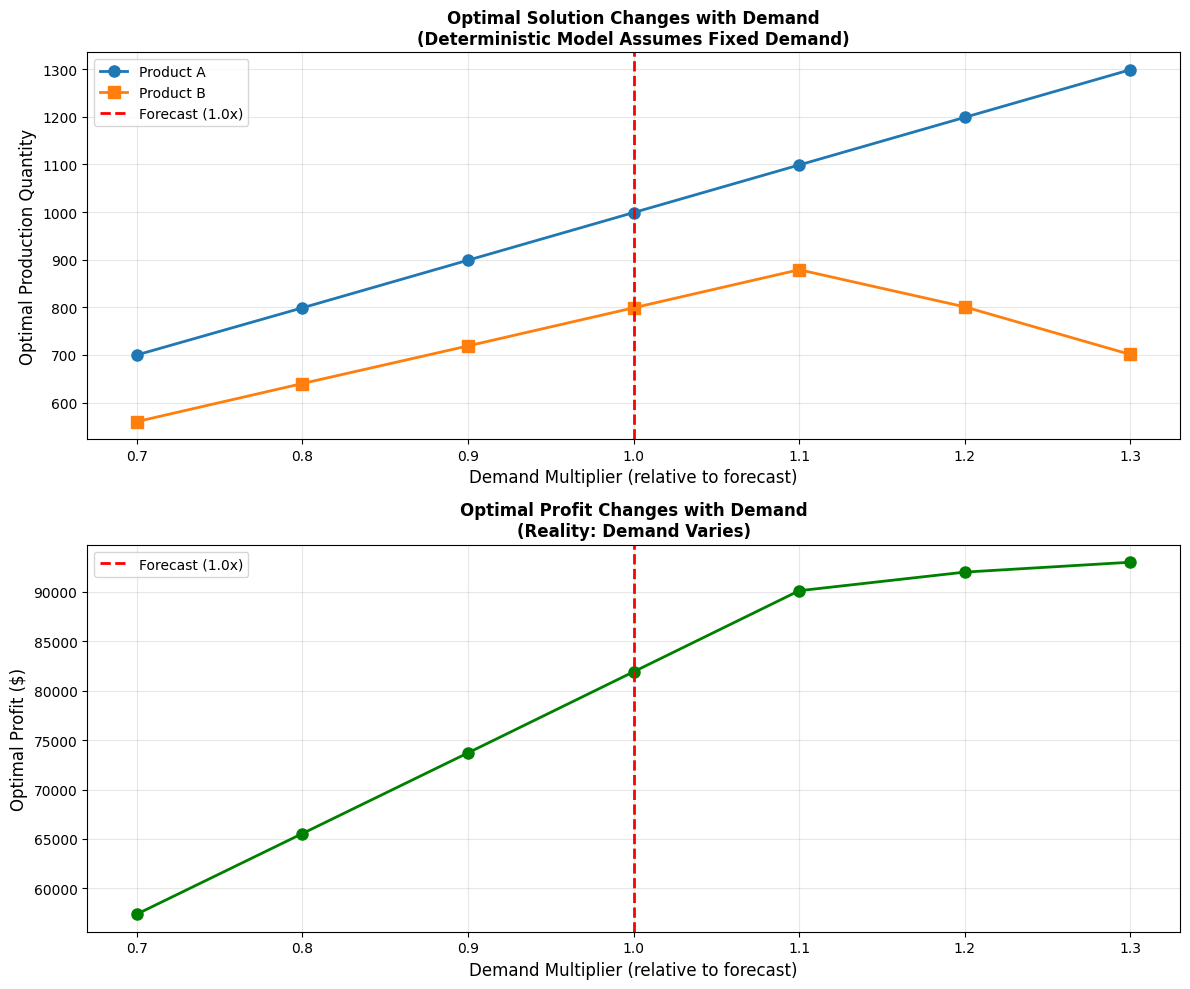


Key Insight:
  - The optimal solution is sensitive to demand
  - Models assume fixed inputs, but reality varies
  - This is why optimization results are estimates, not guarantees


In [7]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Optimal production quantities
ax1 = axes[0]
multipliers = [float(x.replace('x', '')) for x in sensitivity_df['Demand Multiplier']]
ax1.plot(multipliers, sensitivity_df['Optimal A'], 'o-', label='Product A', linewidth=2, markersize=8)
ax1.plot(multipliers, sensitivity_df['Optimal B'], 's-', label='Product B', linewidth=2, markersize=8)
ax1.axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Forecast (1.0x)')
ax1.set_xlabel('Demand Multiplier (relative to forecast)', fontsize=12)
ax1.set_ylabel('Optimal Production Quantity', fontsize=12)
ax1.set_title('Optimal Solution Changes with Demand\n(Deterministic Model Assumes Fixed Demand)', fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Optimal profit
ax2 = axes[1]
ax2.plot(multipliers, sensitivity_df['Optimal Profit'], 'o-', color='green', linewidth=2, markersize=8)
ax2.axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Forecast (1.0x)')
ax2.set_xlabel('Demand Multiplier (relative to forecast)', fontsize=12)
ax2.set_ylabel('Optimal Profit ($)', fontsize=12)
ax2.set_title('Optimal Profit Changes with Demand\n(Reality: Demand Varies)', fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("  - The optimal solution is sensitive to demand")
print("  - Models assume fixed inputs, but reality varies")
print("  - This is why optimization results are estimates, not guarantees")


## Summary: Deterministic Thinking and Its Limits

**Deterministic Models**:
- Assume inputs are fixed and certain
- Treat forecasts as exact values
- Optimize for specific assumed values
- Do not account for uncertainty

**Reality is Uncertain**:
- Demand fluctuates
- Costs vary
- Conditions change
- Inputs differ from assumptions

**What This Means**:
- Optimization finds the best solution for assumed inputs
- If inputs are wrong, the solution is not optimal for reality
- Results are best estimates, not guarantees
- Monitoring and adjustment are essential

**Critical insight**: 
- Models assume certainty; reality is uncertain
- This creates a fundamental limit
- Understanding this limit helps you use optimization correctly

**Practical implication**:
- Treat optimization results as estimates, not guarantees
- Monitor actual conditions vs assumed conditions
- Adjust solutions as conditions change
- Recognize that optimization assumes certainty in an uncertain world
